In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_train = pd.DataFrame(columns=["comment", "sentiment"])
df_test = pd.DataFrame(columns=["comment", "sentiment"])


In [4]:
with open("train.txt", "r") as doc:
    for line in doc:
        line_splited = line.split(";")
        df_train = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)

C:\Users\gusta\AppData\Local\Temp\ipykernel_25304\1780876659.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_25304\1780876659.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_25304\1780876659.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_25304\1780876659.py:4: FutureWar

KeyboardInterrupt: 

In [ ]:
with open("test.txt", "r") as doc:
    for line in doc:
        line_splited = line.split(";")
        df_test = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)

C:\Users\gusta\AppData\Local\Temp\ipykernel_19300\1511937345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_19300\1511937345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_19300\1511937345.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_train.append({"comment": line_splited[0], "sentiment": line_splited[1]}, ignore_index=True)
C:\Users\gusta\AppData\Local\Temp\ipykernel_19300\1511937345.py:4: FutureWarnin

In [ ]:
df_train

comment  sentiment
0                                i didnt feel humiliated  sadness\n
1      i can go from feeling so hopeless to so damned...  sadness\n
2       im grabbing a minute to post i feel greedy wrong    anger\n
3      i am ever feeling nostalgic about the fireplac...     love\n
4                                   i am feeling grouchy    anger\n
...                                                  ...        ...
15995  i just had a very brief time in the beanbag an...  sadness\n
15996  i am now turning and i feel pathetic that i am...  sadness\n
15997                     i feel strong and good overall      joy\n
15998  i feel like this was such a rude comment and i...    anger\n
15999  i know a lot but i feel so stupid because i ca...  sadness\n

[16000 rows x 2 columns]

In [ ]:
df_train.isnull().sum()

comment      0
sentiment    0
dtype: int64

In [ ]:
df_test.isnull().sum()

comment      0
sentiment    0
dtype: int64

In [ ]:
from unidecode import unidecode
import re

def remove_trash_characters(text : str):
    text = text.replace("\n", "")
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = unidecode(text)
    text = text.lower()
    return text




In [ ]:
df_test["sentiment"] = df_test["sentiment"].apply(remove_trash_characters)
df_train["sentiment"] = df_train["sentiment"].apply(remove_trash_characters)
set(df_test["sentiment"])


{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

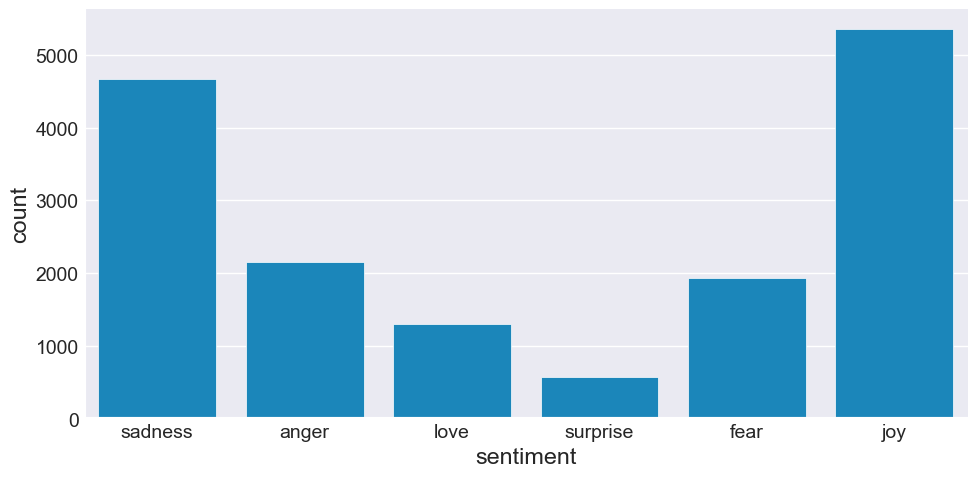

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

sns.catplot(x="sentiment", kind="count", data=df_test, height=5, aspect=2)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatizer(text):
    tokenize_text = nlp(text)
    vect_lemma = []
    for token in tokenize_text:
        vect_lemma.append(token.lemma_)
    return " ".join(vect_lemma)
        

In [ ]:
df_train["comment"] = df_train["comment"].apply(lemmatizer)

In [ ]:
df_test["comment"] = df_test["comment"].apply(lemmatizer)

In [ ]:
df_train

comment sentiment
0                                I do not feel humiliate   sadness
1      I can go from feel so hopeless to so damned ho...   sadness
2          I m grab a minute to post I feel greedy wrong     anger
3      I be ever feel nostalgic about the fireplace I...      love
4                                      I be feel grouchy     anger
...                                                  ...       ...
15995  I just have a very brief time in the beanbag a...   sadness
15996  I be now turn and I feel pathetic that I be st...   sadness
15997                     I feel strong and good overall       joy
15998  I feel like this be such a rude comment and I ...     anger
15999  I know a lot but I feel so stupid because I ca...   sadness

[16000 rows x 2 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stopwords_nltk = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gusta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    sentence = nltk.word_tokenize(text)
    filtred_sentence = [token for token in sentence if token not in stopwords_nltk]
    return " ".join(filtred_sentence)

In [ ]:
df_train["comment"] = df_train["comment"].apply(remove_stopwords)
df_test["comment"] = df_test["comment"].apply(remove_stopwords)

In [ ]:
df_train

comment sentiment
0                                       I feel humiliate   sadness
1      I go feel hopeless damned hopeful around someo...   sadness
2                 I grab minute post I feel greedy wrong     anger
3      I ever feel nostalgic fireplace I know still p...      love
4                                         I feel grouchy     anger
...                                                  ...       ...
15995  I brief time beanbag I say anna I feel like I ...   sadness
15996  I turn I feel pathetic I still wait table sub ...   sadness
15997                         I feel strong good overall       joy
15998                    I feel like rude comment I glad     anger
15999                 I know lot I feel stupid I portray   sadness

[16000 rows x 2 columns]

In [ ]:
df_test

comment sentiment
0                                       I feel humiliate   sadness
1      I go feel hopeless damned hopeful around someo...   sadness
2                 I grab minute post I feel greedy wrong     anger
3      I ever feel nostalgic fireplace I know still p...      love
4                                         I feel grouchy     anger
...                                                  ...       ...
15996  I turn I feel pathetic I still wait table sub ...   sadness
15997                         I feel strong good overall       joy
15998                    I feel like rude comment I glad     anger
15999                 I know lot I feel stupid I portray   sadness
16000  I feel weird I meet w people I text like talk ...      fear

[16001 rows x 2 columns]

In [ ]:
df_train.to_csv("cleaned_data_train.csv", index=False)
df_test.to_csv("cleaned_data_test.csv", index=False)

In [5]:
df_train = pd.read_csv("cleaned_data_train.csv")
df_test = pd.read_csv("cleaned_data_test.csv")
set(df_train["sentiment"])


{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [6]:
reference = {'anger':1, 'fear':2, 'joy':3, 'love':4, 'sadness':5, 'surprise':6}

df_train["sentiment"] = df_train["sentiment"].apply(lambda x : reference[f"{x}"])


In [7]:
df_test["sentiment"] = df_test["sentiment"].apply(lambda x : reference[f"{x}"])

In [8]:
x_train, x_test, y_train, y_test = df_train["comment"], df_test["comment"], df_train["sentiment"], df_test["sentiment"]
y_train

0        5
1        5
2        1
3        4
4        1
        ..
15995    5
15996    5
15997    3
15998    1
15999    5
Name: sentiment, Length: 16000, dtype: int64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(x_train)
x_train_vect = vectorizer.transform(x_train)
x_test_vect = vectorizer.transform(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest_model.fit(x_train_vect, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
y_pred = random_forest_model.predict(x_test_vect)
y_pred

array([5, 5, 1, ..., 1, 5, 2], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy: {accuracy*100:.2f}%")

accuracy: 99.76%
